# 📘 **Notebook 01: Exploratory Data Analysis (EDA)**

### **1. Introduction**

**Goal:** Before jumping into modeling, we need to understand the "shape" and quality of our data. This notebook covers:

* Checking for missing values and duplicates.
* Analyzing the distribution of the target variable (Churn).
* Identifying skewness and outliers in numerical features.
* Exploring categorical data (Geography & Marketing).
* Correlations and relationships between features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context('notebook', font_scale=1.2)

if '../src' not in sys.path:
    sys.path.append('../src')
import config

print("Libraries and config loaded successfully.")

Libraries and config loaded successfully.


In [2]:
df = pd.read_csv(config.RAW_DATA_PATH)
print(f"Dataset loaded successfully. Shape: {df.shape}")

Dataset loaded successfully. Shape: (50000, 33)


In [3]:
df.head()

,user_id,age,country,city,reg_days,marketing_source,sessions_30d,sessions_90d,avg_session_duration_90d,median_pages_viewed_30d,...,support_tickets_2024,avg_csat_2024,emails_open_rate_90d,emails_click_rate_90d,review_count_2024,avg_review_stars_2024,rfm_recency,rfm_frequency,rfm_monetary,churn_label
0,U00001,20,Thailand,Bangkok,262,ads_fb,2,4,728.93,4.41,...,1,4.30,0.252,0.029,0,4.46,55,4,80.58,0
1,U00002,34,Indonesia,Jakarta,908,organic,2,6,671.11,7.75,...,0,4.27,0.388,0.023,0,4.79,59,2,49.11,0
2,U00003,31,Indonesia,Surabaya,406,referral,0,3,493.29,2.58,...,0,4.35,0.343,0.014,0,4.59,73,1,11.95,1
3,U00004,23,Malaysia,Johor Bahru,698,ads_fb,0,4,305.83,4.40,...,0,4.54,0.270,0.027,0,4.52,65,1,14.63,1
4,U00005,28,Vietnam,Ho Chi Minh City,650,influencer,1,7,946.16,6.04,...,0,4.04,0.212,0.073,1,4.79,68,5,116.32,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   50000 non-null  object 
 1   age                       50000 non-null  int64  
 2   country                   50000 non-null  object 
 3   city                      50000 non-null  object 
 4   reg_days                  50000 non-null  int64  
 5   marketing_source          50000 non-null  object 
 6   sessions_30d              50000 non-null  int64  
 7   sessions_90d              50000 non-null  int64  
 8   avg_session_duration_90d  50000 non-null  float64
 9   median_pages_viewed_30d   50000 non-null  float64
 10  search_queries_30d        50000 non-null  int64  
 11  device_mix_ratio          50000 non-null  float64
 12  app_version_major         50000 non-null  object 
 13  orders_30d                50000 non-null  int64  
 14  orders

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,50000,50000,U00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,50000.0,NaN,NaN,NaN,26.02852,4.903528,18.0,22.0,26.0,30.0,34.0
country,50000,5,Indonesia,14237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,50000,15,Surabaya,4772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reg_days,50000.0,NaN,NaN,NaN,516.49142,280.046192,30.0,275.0,518.0,759.0,999.0
marketing_source,50000,5,organic,22459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sessions_30d,50000.0,NaN,NaN,NaN,1.68972,1.858396,0.0,0.0,1.0,2.0,42.0
sessions_90d,50000.0,NaN,NaN,NaN,5.1675,4.722653,0.0,2.0,4.0,7.0,114.0
avg_session_duration_90d,50000.0,NaN,NaN,NaN,720.603792,196.935683,60.0,587.4875,721.67,854.13,1484.73
median_pages_viewed_30d,50000.0,NaN,NaN,NaN,5.993101,2.298525,1.0,4.4,5.98,7.55,16.49


### **2. Target Variable Distribution**

**Context**: We start by looking at our target: churn_label.

- **Observation**: The plot shows a clear class imbalance. About 25% of users have churned (1), while 75% remain active (0).

- **Technical Note**: This 1:3 ratio isn't extremely rare, but it is significant. We will need to use Stratified Splitting validation to ensure our training and validation sets maintain this exact ratio.

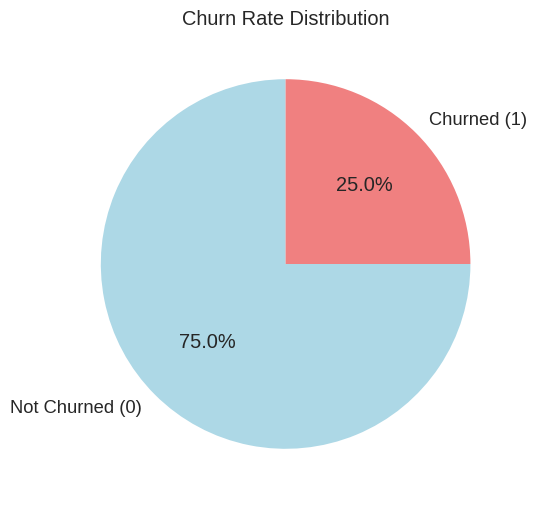

In [6]:
churn_rate = df[config.TARGET_VARIABLE].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(churn_rate, 
        labels=['Not Churned (0)', 'Churned (1)'], 
        autopct='%1.1f%%',
        colors=['lightblue', 'lightcoral'],
        startangle=90)

plt.savefig(os.path.join(config.FIGURES_PATH, 'churn_rate.png'), dpi=300, bbox_inches = 'tight')
plt.title('Churn Rate Distribution')
plt.show()


### **3. Numerical Feature Distributions**
**Context**: Let's check the distribution of key metrics like `gmv_2024` (Spend), `sessions_90d` (Activity), and `days_since_last_order` (Recency).

- **Skewness**: The histograms (left) reveal that most financial and activity features are heavily right-skewed. Most users have low-to-moderate activity, with a "long tail" of high-value users.

- **Outliers**: The boxplots (right) confirm the presence of significant outliers.

- **Action Item**: We should apply Log Transformation (e.g., `np.log1p`) to normalize these skewed distributions and use Winsorizing (capping) to limit the impact of extreme outliers in the next preprocessing step.

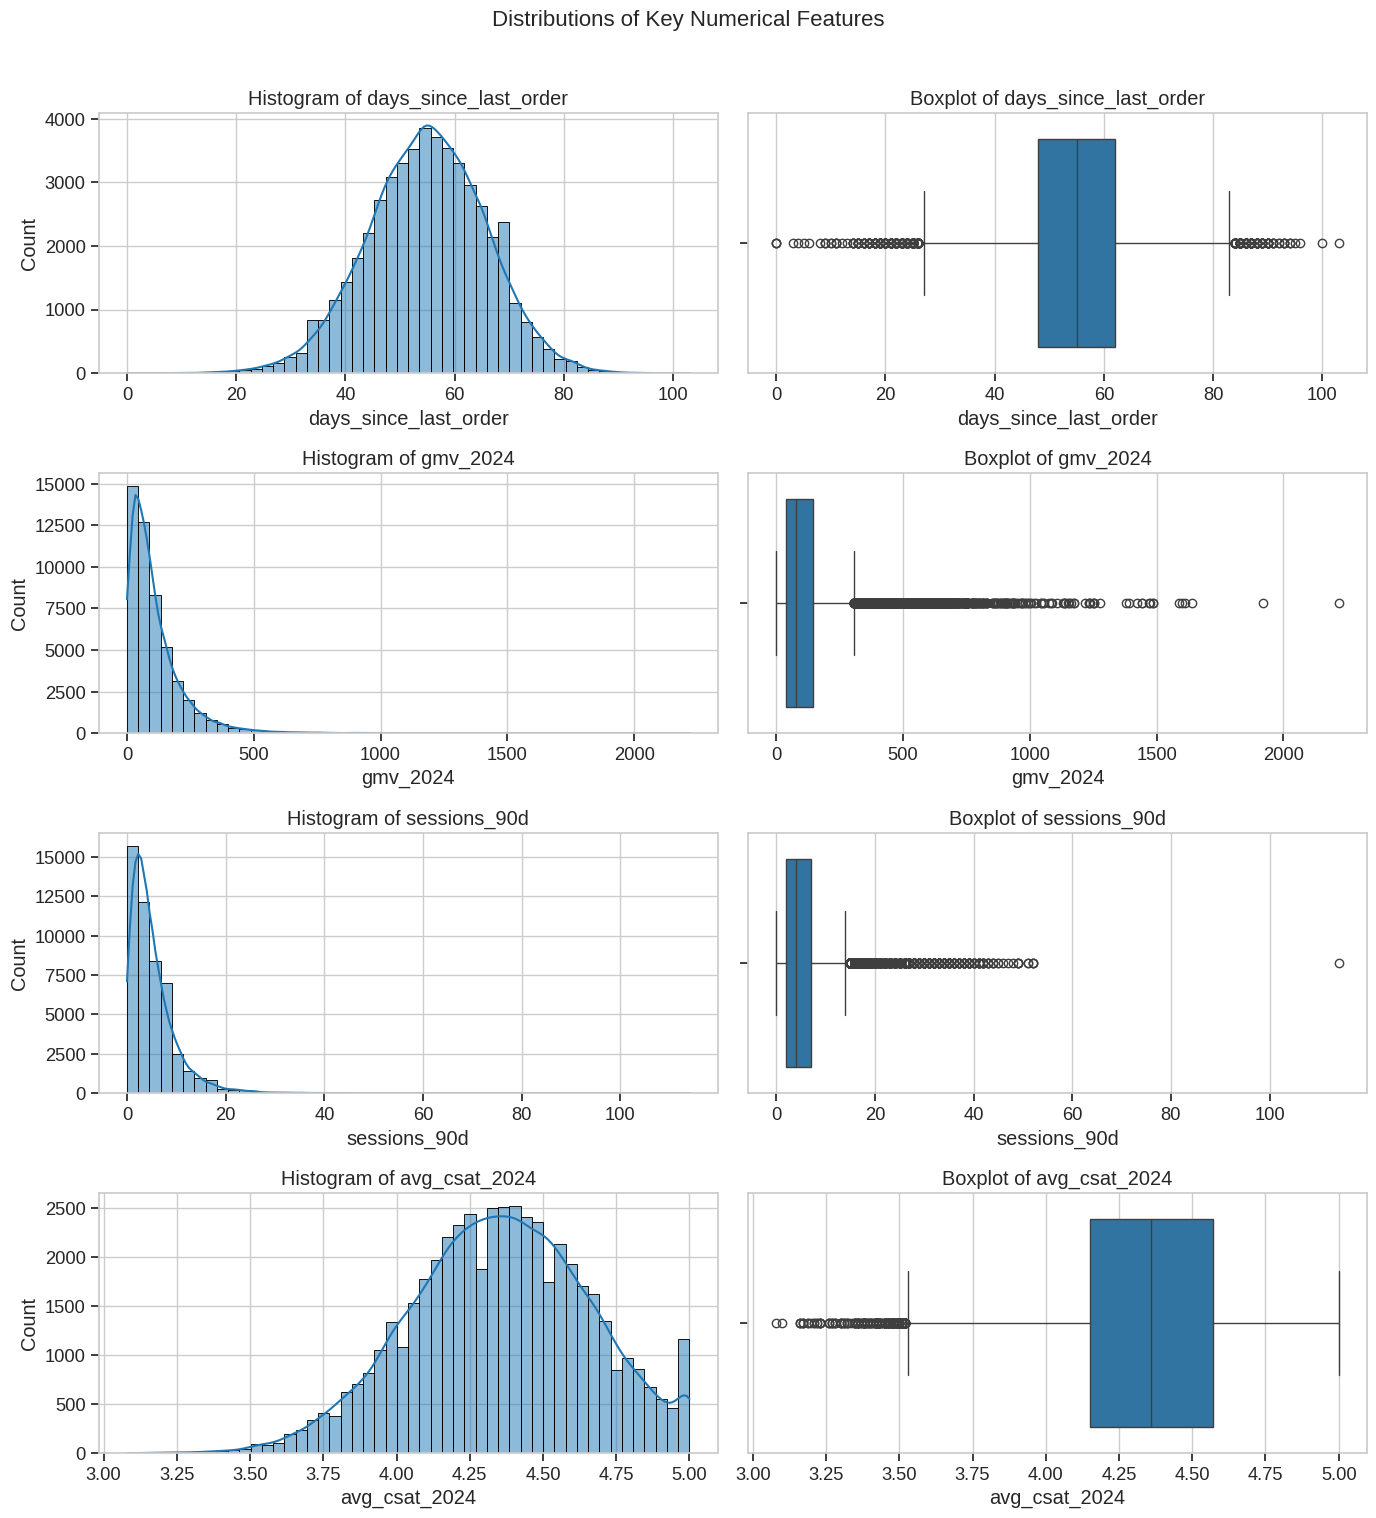

In [ ]:
key_numerical_features = ['days_since_last_order', 'gmv_2024', 'sessions_90d', 'avg_csat_2024']

fig, axes = plt.subplots(len(key_numerical_features), 2, figsize=(14, 16))
fig.suptitle('Distributions of Key Numerical Features', fontsize=16)

for i, col in enumerate(key_numerical_features):
    sns.histplot(df[col], kde=True, ax=axes[i, 0], bins=50)
    axes[i, 0].set_title(f'Histogram of {col}')
    
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

### **4. Categorical Analysis**

**Context**: Who are our users and where do they come from?

- **Geography**: The dataset is dominated by users from Southeast Asia, with Indonesia and Vietnam being the largest segments.

- **Marketing Source**: `Organic` traffic is the leading source, followed by paid channels like `ads_fb`.

- **Action Item**: Features like `Country` have high cardinality (many categories). We might need to use Frequency Encoding or One-Hot Encoding to convert these into numbers for the model.

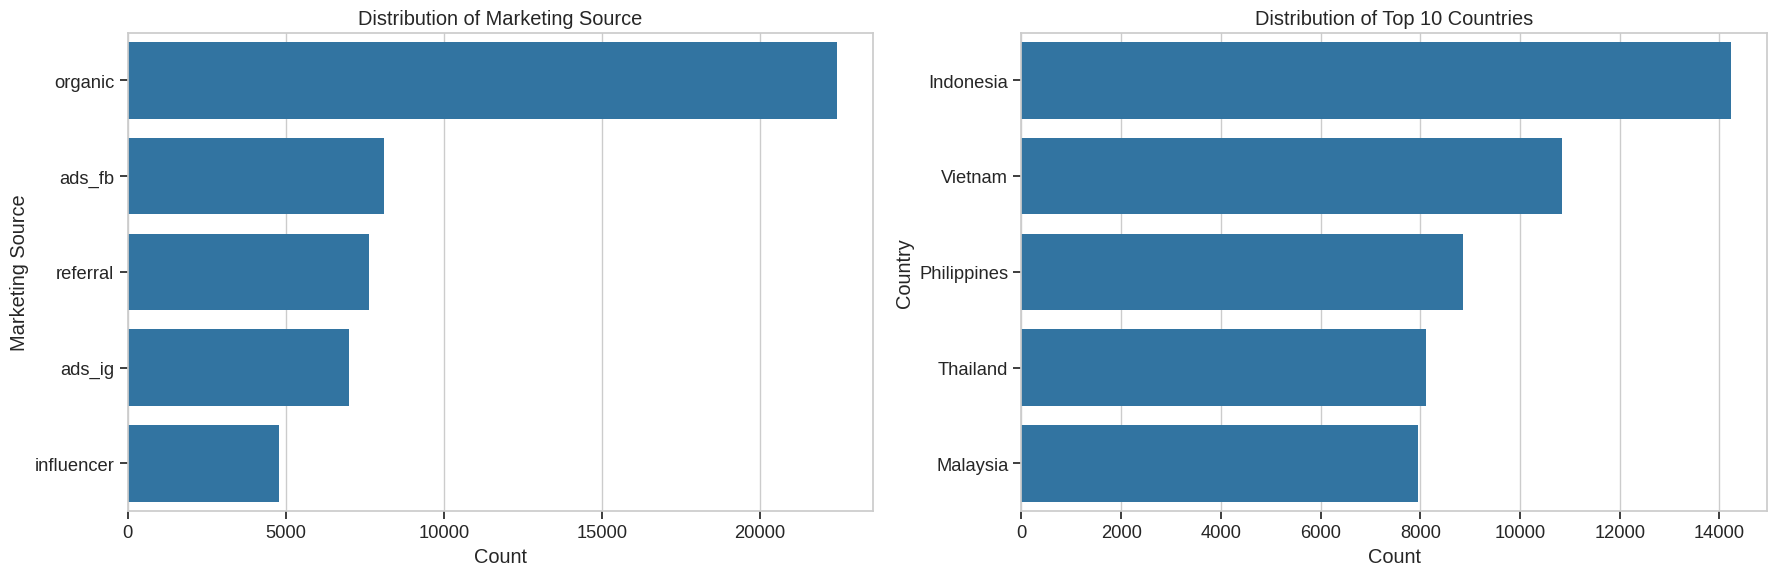

In [9]:
key_categorical_features = ['marketing_source', 'country']

plt.figure(figsize=(18, 6))

# Plot for marketing_source
plt.subplot(1, 2, 1)
sns.countplot(y='marketing_source', data=df, order=df['marketing_source'].value_counts().index)
plt.title('Distribution of Marketing Source')
plt.xlabel('Count')
plt.ylabel('Marketing Source')

# Plot for top 10 countries
plt.subplot(1, 2, 2)
top_10_countries = df['country'].value_counts().nlargest(10).index
sns.countplot(y='country', data=df, order=top_10_countries)
plt.title('Distribution of Top 10 Countries')
plt.xlabel('Count')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

### **5. Bivariate Analysis: Features vs. Target**

**Context**: Do churned users behave differently from active users?

- Recency (`days_since_last_order`): There is a clear separation. Churned users (1) have a much higher median "days inactive" compared to retained users (0). This will likely be our strongest predictor.

- Satisfaction (`avg_csat_2024`): Churned users tend to have slightly lower satisfaction scores, though the overlap is significant.

- Spend (`gmv_2024`): Interestingly, the spending distribution is tighter for churned users, whereas retained users show a wider range of spending behavior.

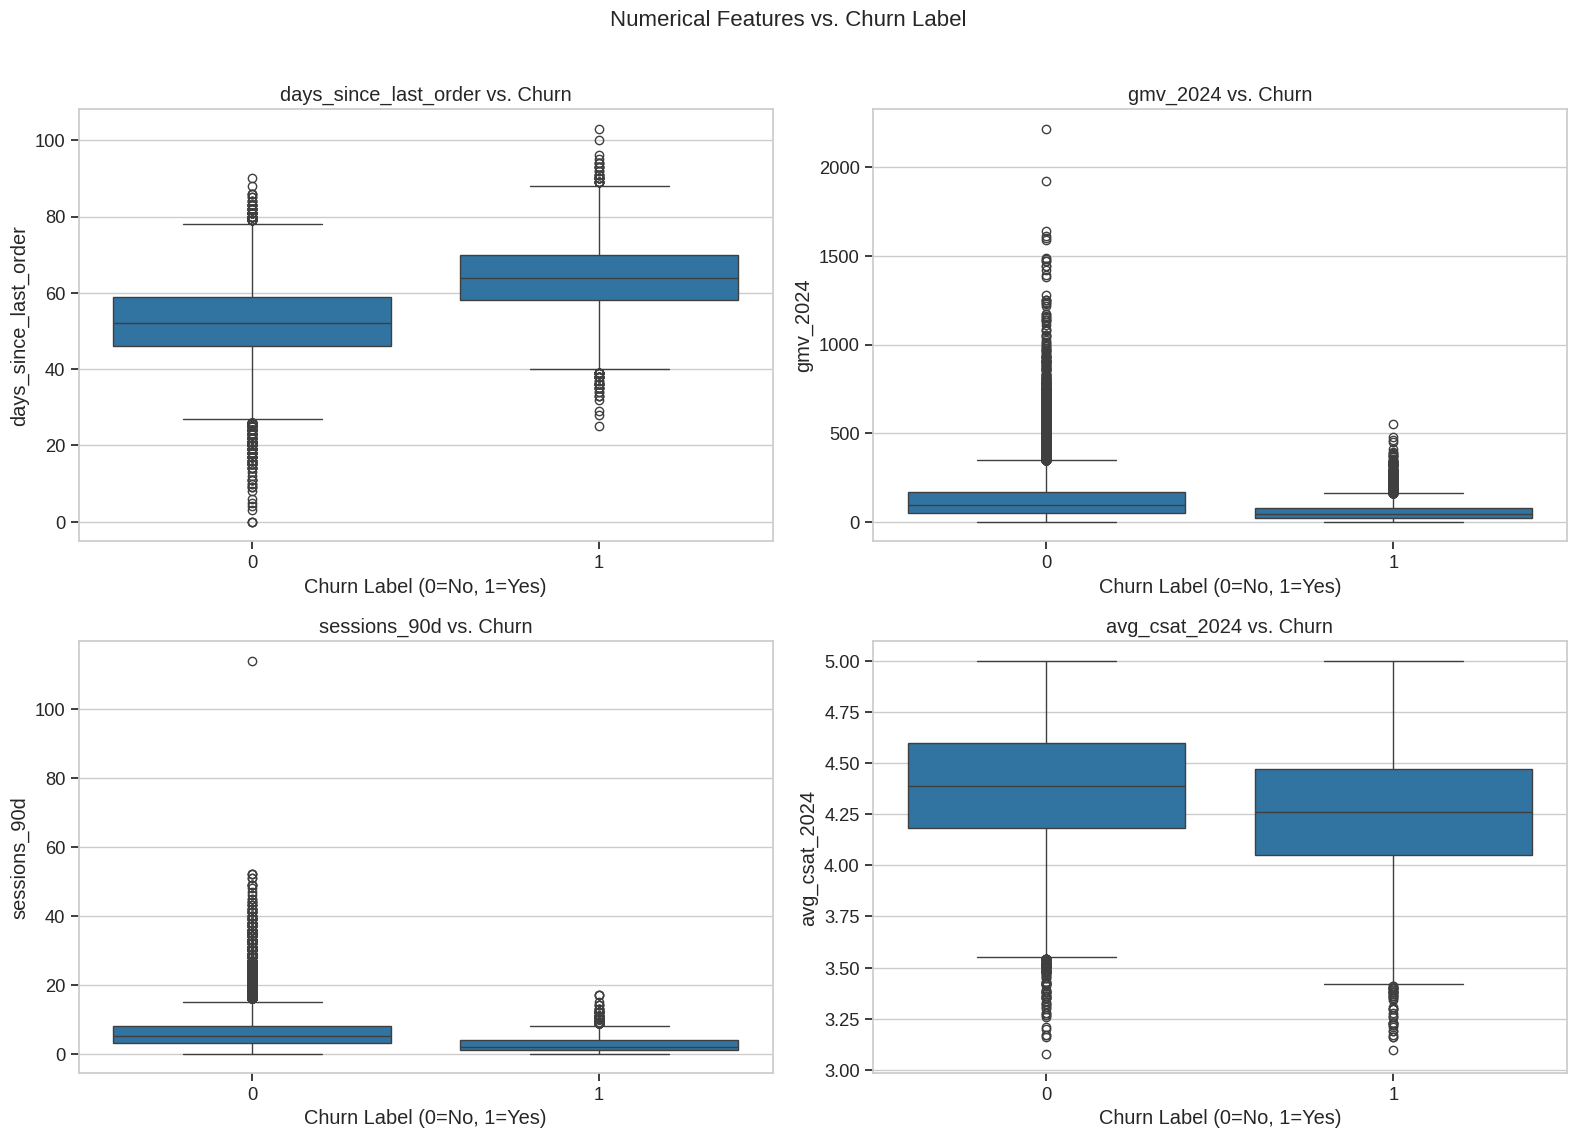

In [ ]:
bivariate_numerical = ['days_since_last_order', 'gmv_2024', 'sessions_90d', 'avg_csat_2024']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
fig.suptitle('Numerical Features vs. Churn Label', fontsize=16)

for i, col in enumerate(bivariate_numerical):
    sns.boxplot(x=config.TARGET_VARIABLE, y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs. Churn')
    axes[i].set_xlabel('Churn Label (0=No, 1=Yes)')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

In [ ]:
corr_matrix = df[config.NUMERICAL_FEATURES].corr()

### **6. Correlation Analysis**

**Context**: Checking for Multicollinearity (features that carry the same information).

- **Observation**: We see strong red blocks along the diagonal. For example, orders_30d is highly correlated with orders_90d.

- **Technical Note**: While tree-based models (like XGBoost/LightGBM) are generally robust to correlated features, we should be aware of this redundancy. If we were using Linear Regression heavily, we would need to drop some of these to reduce noise.

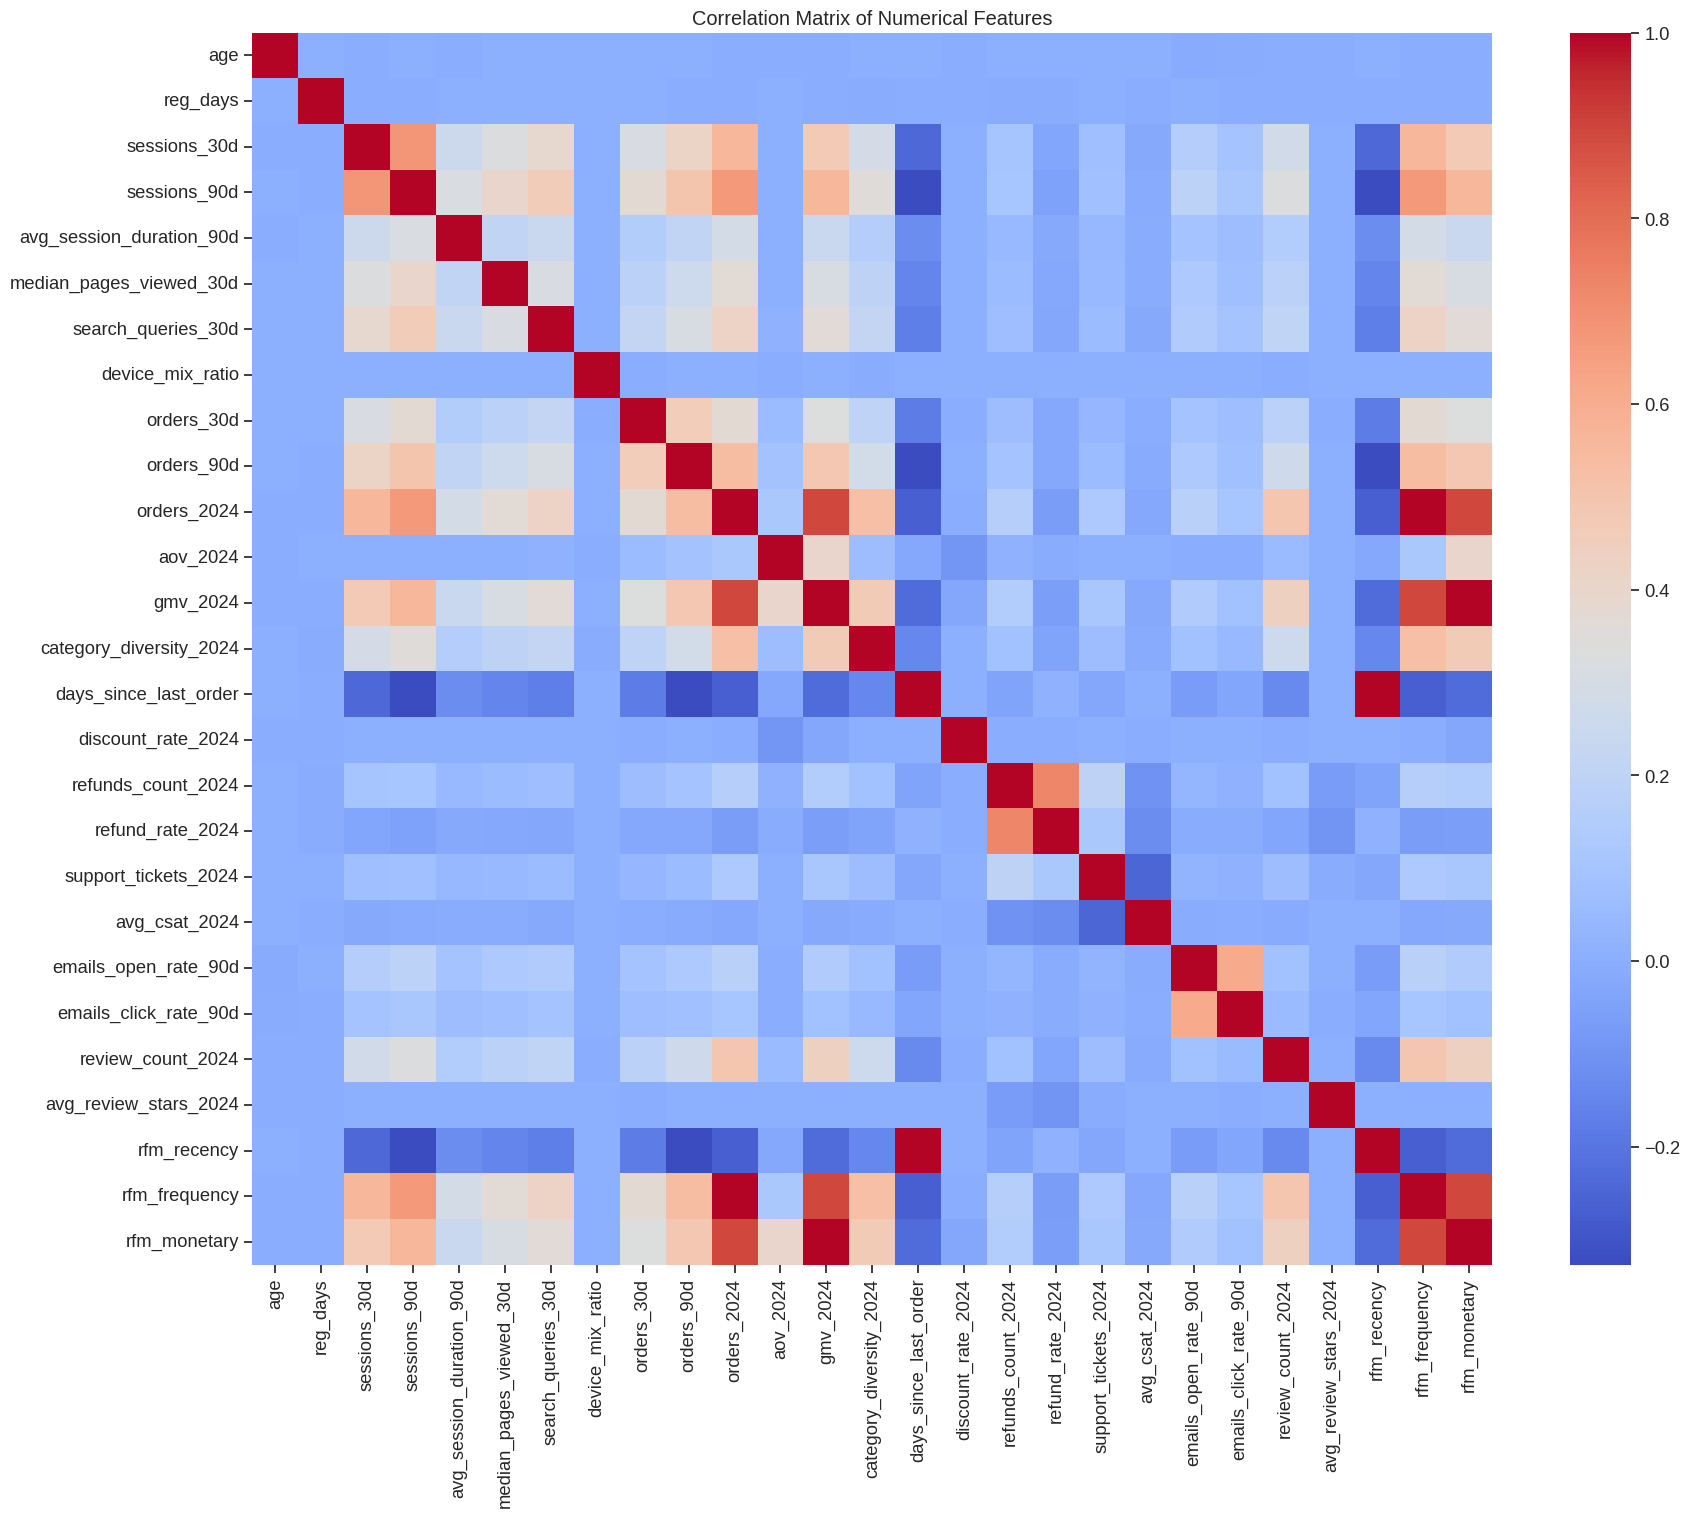

In [13]:
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 📝 **Summary**
From this EDA, we have identified the necessary steps for our Data Pipeline:

1. **Imbalance**: Use Stratified K-Fold during training.

2. **Skewness**: Apply Log Transformation to gmv, sessions, etc.

3. **Outliers**: Cap extreme values using quantile thresholds.

4. **Encoding**: Convert Country and City using Frequency Encoding.